In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

In [3]:
# Load the dataset
data = pd.read_csv("Heart_Disease_Prediction.csv", sep=",")

In [4]:
data.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
# Missing Data Handling
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


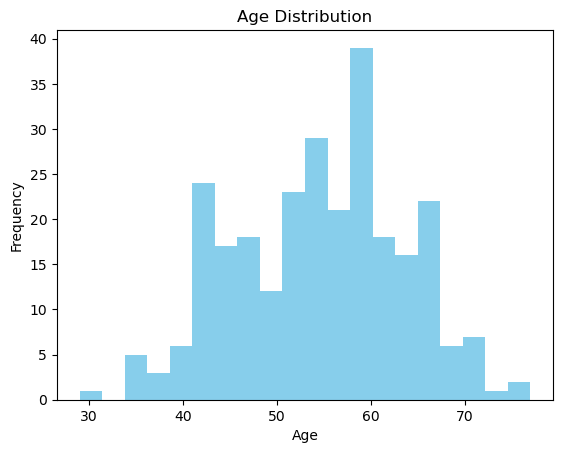

In [6]:
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Data Cleaning

In [7]:
# Data Preprocessing
# Normalize numeric features using Z-score standardization
numeric_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [8]:
# Encode categorical variables (assuming 'Sex' and 'Heart Disease' are categorical)
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [9]:
# One-hot encoding for 'Chest Pain Type', 'EKG Results', 'Exercise Angina', 'Slope of ST', 'Number of vessels fluro', and 'Thallium'
categorical_features = ['Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [10]:
# Outlier Detection and Treatment using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
data['Outlier'] = outlier_detector.fit_predict(data.drop('Heart Disease', axis=1))

In [11]:
# Remove outliers
data = data[data['Outlier'] == 1]

In [12]:
# Drop the 'Outlier' column
data.drop('Outlier', axis=1, inplace=True)

In [13]:
data.head()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,ST depression,Heart Disease,Chest pain type_2,Chest pain type_3,...,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
0,1.712094,1,-0.075410,1.402212,0,-1.759208,1.181012,Presence,False,False,...,False,True,False,True,False,False,False,True,False,False
1,1.382140,0,-0.916759,6.093004,0,0.446409,0.481153,Absence,False,True,...,False,True,False,True,False,False,False,False,False,True
2,0.282294,1,-0.411950,0.219823,0,-0.375291,-0.656118,Presence,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1.052186,1,-0.187590,0.258589,0,-1.932198,-0.743600,Absence,False,False,...,False,False,True,True,False,True,False,False,False,True
4,2.152032,0,-0.636310,0.374890,0,-1.240239,-0.743600,Absence,True,False,...,False,True,True,False,False,True,False,False,False,False


In [14]:
# Find the number of unique values in each column
unique_value_counts = data.nunique()

print("Number of Unique Values in Each Column:")
print(unique_value_counts)

Number of Unique Values in Each Column:
Age                           40
Sex                            2
BP                            46
Cholesterol                  141
FBS over 120                   2
Max HR                        88
ST depression                 37
Heart Disease                  2
Chest pain type_2              2
Chest pain type_3              2
Chest pain type_4              2
EKG results_1                  1
EKG results_2                  2
Exercise angina_1              2
Slope of ST_2                  2
Slope of ST_3                  2
Number of vessels fluro_1      2
Number of vessels fluro_2      2
Number of vessels fluro_3      2
Thallium_6                     2
Thallium_7                     2
dtype: int64


In [15]:
# Drop the 'EKG results_1' column
data.drop('EKG results_1', axis=1, inplace=True)

Visualization

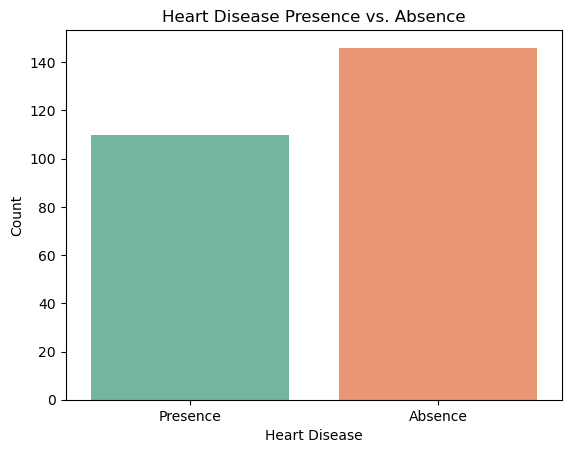

In [16]:
import seaborn as sns

sns.countplot(x='Heart Disease', data=data, palette='Set2')
plt.title('Heart Disease Presence vs. Absence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

def convert_to_numerical(data):
    le = LabelEncoder()
    
    # Find object columns
    object_columns = data.select_dtypes(include=['object']).columns
    
    # Convert object columns to numerical using LabelEncoder
    for col in object_columns:
        data[col] = le.fit_transform(data[col])
    
    return data


# Convert object columns to numerical using LabelEncoder
data = convert_to_numerical(data)



In [18]:
data.corr()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,ST depression,Heart Disease,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7
Age,1.000000,-0.078220,0.246993,0.232647,0.120412,-0.391521,0.176005,0.193473,-0.155391,-0.034510,0.122932,1.187607e-01,0.091464,0.138044,0.031627,0.184398,0.212535,0.149067,0.044451,8.763774e-02
Sex,-0.078220,1.000000,0.001891,-0.210251,0.037183,-0.088418,0.197908,0.340728,-0.077192,-0.133643,0.146435,5.919675e-02,0.199948,0.042304,0.099858,0.108036,0.006778,0.102625,0.141560,3.695706e-01
BP,0.246993,0.001891,1.000000,0.170105,0.098022,-0.013897,0.144526,0.103517,-0.069703,-0.055822,0.004172,1.021737e-01,0.022663,-0.029243,0.134476,-0.033056,-0.012716,0.069341,0.035093,8.748132e-02
Cholesterol,0.232647,-0.210251,0.170105,1.000000,0.024988,-0.015408,0.007738,0.097765,-0.015436,-0.033482,0.074368,1.699961e-01,0.079717,0.038129,-0.036115,0.006890,0.098996,0.057741,-0.105816,5.277316e-02
FBS over 120,0.120412,0.037183,0.098022,0.024988,1.000000,0.000770,-0.048323,-0.037420,-0.013976,0.105926,-0.119910,4.604093e-02,-0.043505,-0.098888,0.087358,0.015662,0.036345,0.136709,-0.026163,-3.700006e-04
Max HR,-0.391521,-0.088418,-0.013897,-0.015408,0.000770,1.000000,-0.372113,-0.419613,0.237545,0.153454,-0.360338,-6.399392e-02,-0.376841,-0.420065,-0.082428,-0.208756,-0.045538,-0.188417,-0.125955,-2.469703e-01
ST depression,0.176005,0.197908,0.144526,0.007738,-0.048323,-0.372113,1.000000,0.410935,-0.260227,-0.077119,0.199102,6.998323e-02,0.311884,0.420692,0.334302,0.017089,0.169175,0.105863,0.048820,3.211150e-01
Heart Disease,0.193473,0.340728,0.103517,0.097765,-0.037420,-0.419613,0.410935,1.000000,-0.249952,-0.292378,0.498909,1.736001e-01,0.410522,0.358300,0.049552,0.227862,0.248014,0.199668,0.049552,5.177125e-01
Chest pain type_2,-0.155391,-0.077192,-0.069703,-0.015436,-0.013976,0.237545,-0.260227,-0.249952,1.000000,-0.278454,-0.416678,-9.585866e-02,-0.228391,-0.201664,-0.040008,-0.076488,-0.059761,-0.112753,-0.040008,-1.905340e-01
Chest pain type_3,-0.034510,-0.133643,-0.055822,-0.033482,0.105926,0.153454,-0.077119,-0.292378,-0.278454,1.000000,-0.608426,-1.206359e-01,-0.285591,-0.108135,-0.007635,0.037780,-0.178740,0.013349,-0.092620,-1.653641e-01


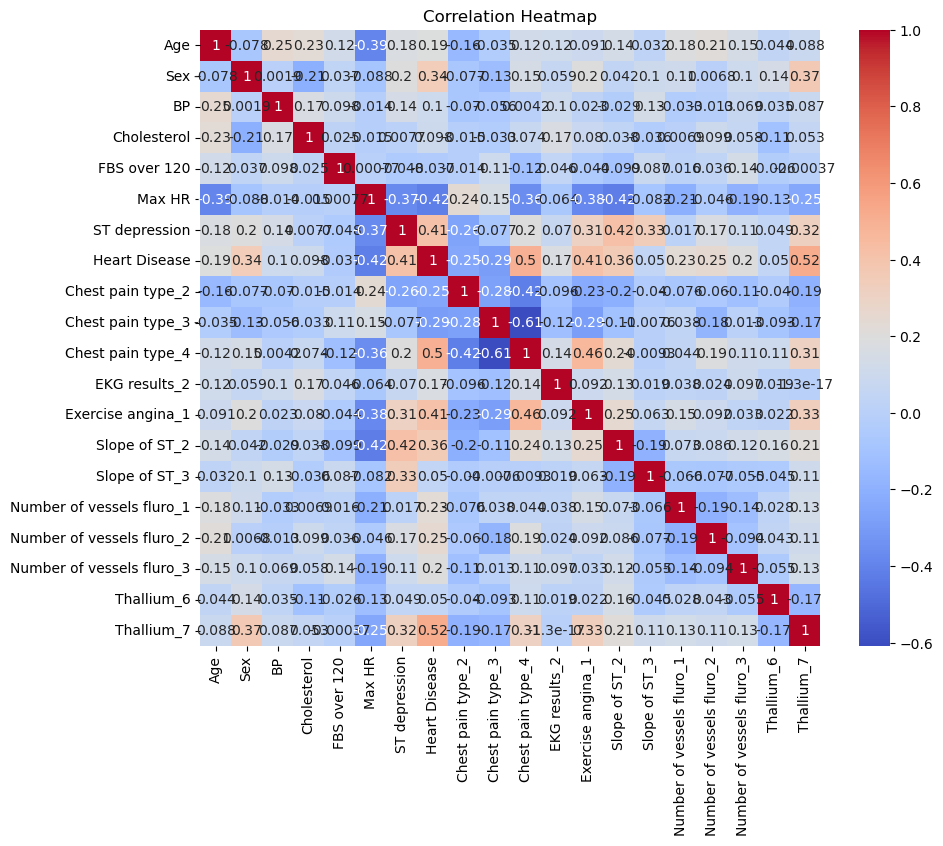

In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

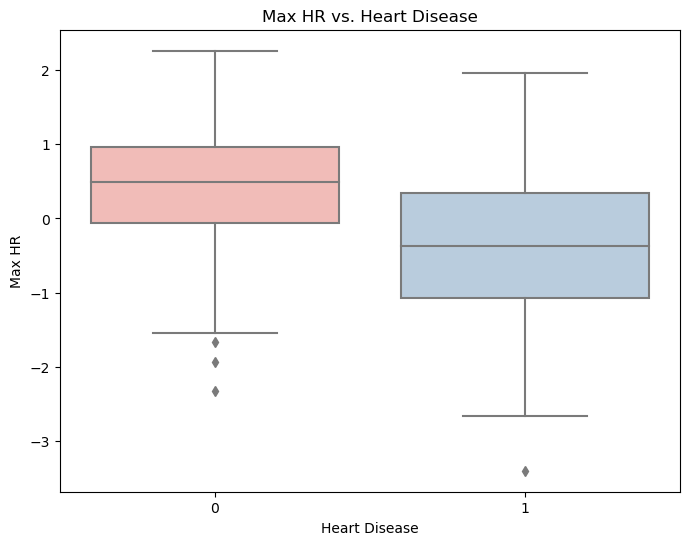

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease', y='Max HR', data=data, palette='Pastel1')
plt.title('Max HR vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Max HR')
plt.show()

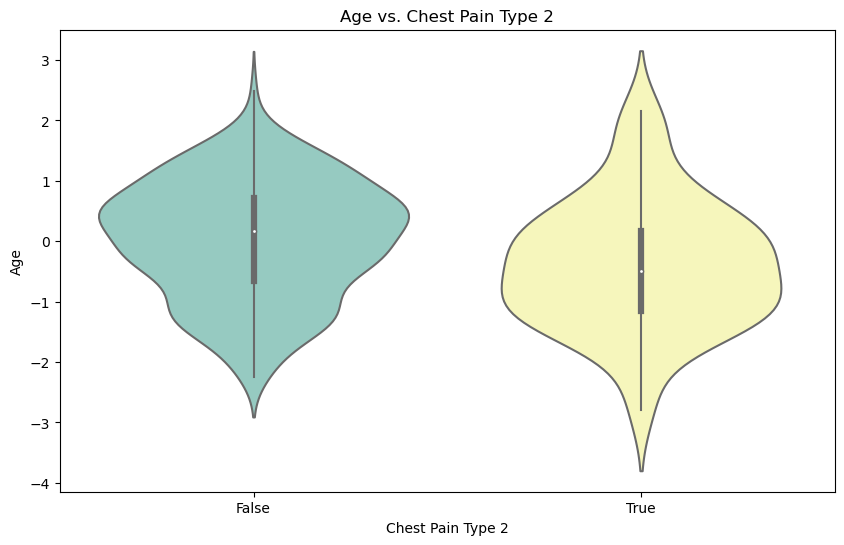

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Chest pain type_2', y='Age', data=data, palette='Set3')
plt.title('Age vs. Chest Pain Type 2')
plt.xlabel('Chest Pain Type 2')
plt.ylabel('Age')
plt.show()

In [22]:
# Separate the features and target variable
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

In [23]:
# Feature Selection using SelectKBest with ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k=5)  # You can adjust 'k' as needed
X_new = selector.fit_transform(X, y)

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Logistic Regression model

Test Accuracy: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.65      0.65      0.65        20

    accuracy                           0.73        52
   macro avg       0.72      0.72      0.72        52
weighted avg       0.73      0.73      0.73        52



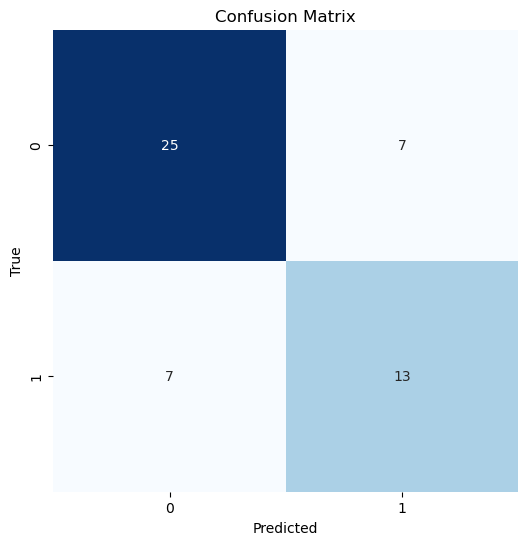

In [25]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Decision Tree model

Decision Tree Test Accuracy: 0.7692307692307693
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.72      0.65      0.68        20

    accuracy                           0.77        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.77      0.77      0.77        52



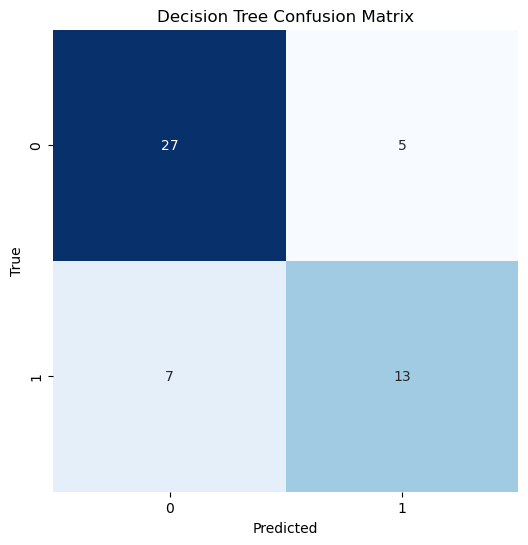

In [26]:
# Createing the Decision Tree model
dt_model = DecisionTreeClassifier()

# Training the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt}")

report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)

# Plot the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Suppor Vector Machine

SVM Test Accuracy: 0.8461538461538461
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.80      0.80      0.80        20

    accuracy                           0.85        52
   macro avg       0.84      0.84      0.84        52
weighted avg       0.85      0.85      0.85        52



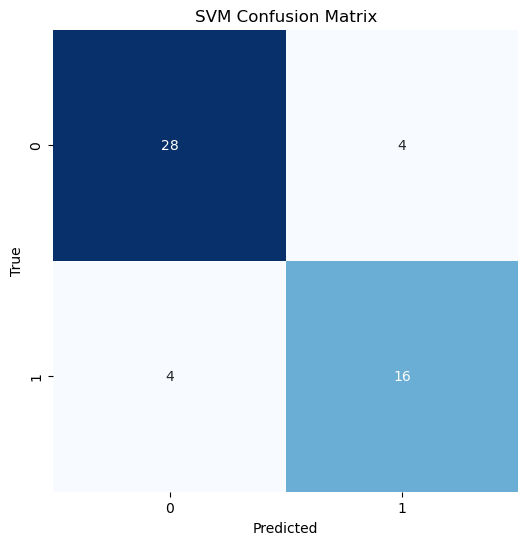

In [27]:
# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm}")

report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()


Random Forest model

Random Forest Test Accuracy: 0.7884615384615384
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.74      0.70      0.72        20

    accuracy                           0.79        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.79      0.79      0.79        52



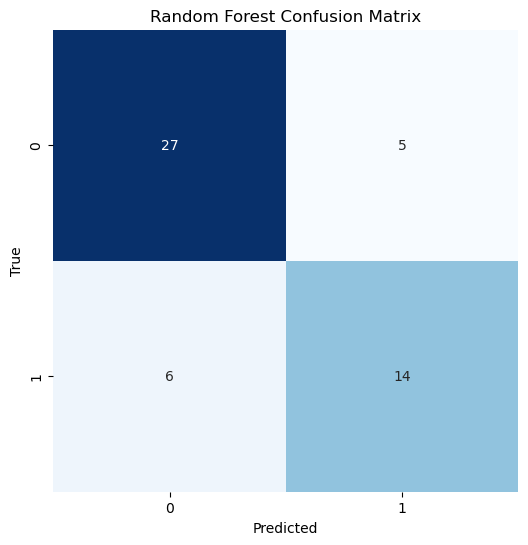

In [28]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf}")

report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

# Plot the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()


Logistic Regression model with hyperparameter tuning

Logistic Regression Test Accuracy: 0.7307692307692307
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.65      0.65      0.65        20

    accuracy                           0.73        52
   macro avg       0.72      0.72      0.72        52
weighted avg       0.73      0.73      0.73        52



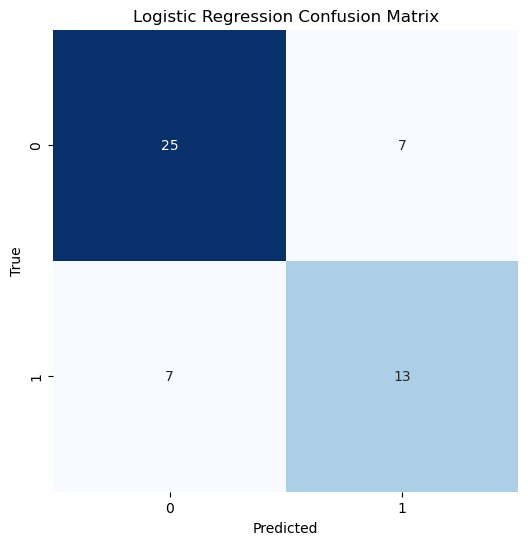

In [29]:
# Create and train the Logistic Regression model with hyperparameter tuning
lr_model = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_

# Make predictions on the test set
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the Logistic Regression model
ht_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {ht_accuracy_lr}")

ht_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:\n", ht_report_lr)

# Plot the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Test Accuracy: 0.7884615384615384
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.74      0.70      0.72        20

    accuracy                           0.79        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.79      0.79      0.79        52



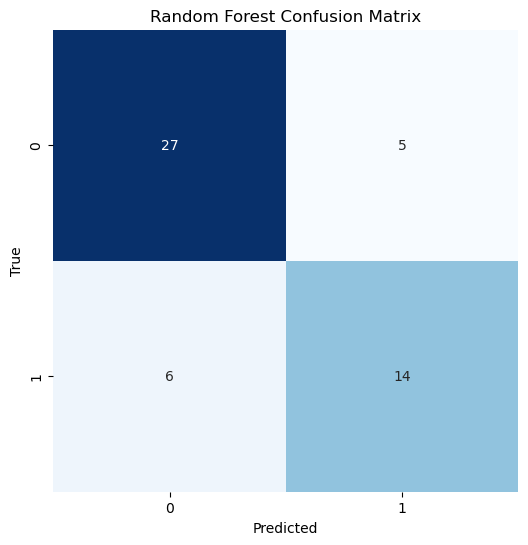

In [30]:
# Create and train the Random Forest model with hyperparameter tuning
rf_model = RandomForestClassifier()
params = {'n_estimators': [10, 50, 100, 200]}
grid_search_rf = GridSearchCV(rf_model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
ht_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {ht_accuracy_rf}")

ht_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", ht_report_rf)

# Plot the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

Decision Tree model with hyperparameter tuning

Decision Tree Test Accuracy: 0.7692307692307693
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.72      0.65      0.68        20

    accuracy                           0.77        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.77      0.77      0.77        52



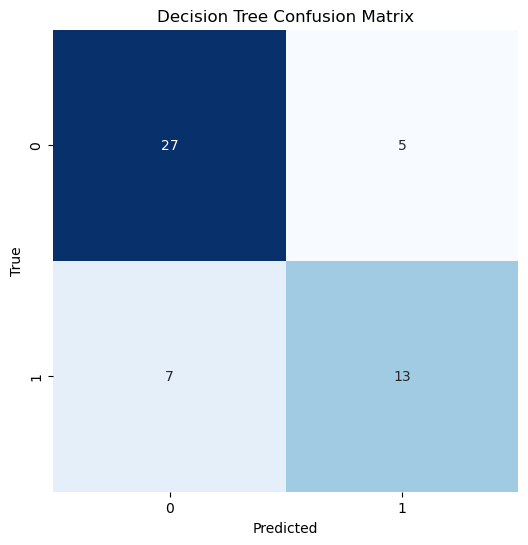

In [31]:
# Create and train the Decision Tree model with hyperparameter tuning
dt_model = DecisionTreeClassifier()
params = {'max_depth': [None, 5, 10, 20]}
grid_search_dt = GridSearchCV(dt_model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the Decision Tree model
ht_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {ht_accuracy_dt}")

ht_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", ht_report_dt)

# Plot the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Support Vector Machine (SVM) model with hyperparameter tuning

SVM Test Accuracy: 0.8269230769230769
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.76      0.80      0.78        20

    accuracy                           0.83        52
   macro avg       0.82      0.82      0.82        52
weighted avg       0.83      0.83      0.83        52



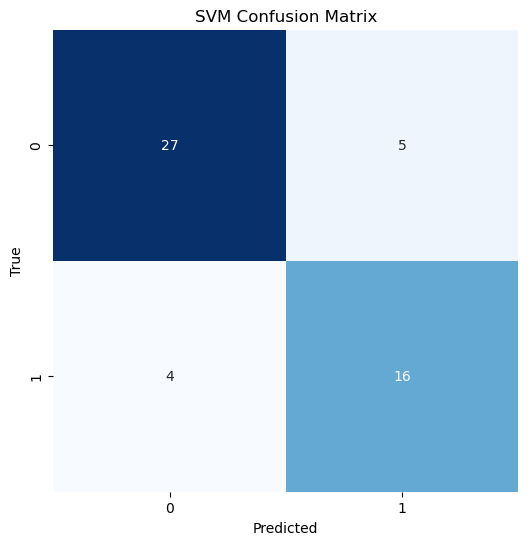

In [32]:
# Create and train the Support Vector Machine (SVM) model with hyperparameter tuning
svm_model = SVC()
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the SVM model
ht_accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {ht_accuracy_svm}")

ht_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", ht_report_svm)

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()